In [1]:
# Store url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

# Import `requests`
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

In [2]:
# Extract HTML from Response object and print
html = r.text
#print(html)

In [3]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup


# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

In [4]:
# Get soup title
soup.title


<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [5]:
soup.title.string

'\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    '

In [6]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

In [7]:
# Get the text out of the soup and print it
text = soup.get_text()
#print(text)

ï»¿



      Moby Dick; Or the Whale, by Herman Melville
    


    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2      { margin-left: 20%;}
    div.fig    { display:block; margin:0 auto; text-align:center; }
    div.middle { margin-left: 20%; margin-right: 20%; text-align: justify; }
    .figleft   {float: left; margin-left: 0%; margin-right: 1%;}
    .figright 

In [9]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman']

In [10]:
# Initialize new list
words = []


# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


# Print several items from list as sanity check
words[:8]

['ï', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman']

In [11]:
# Import nltk
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [12]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['ï', 'moby', 'dick', 'whale', 'herman']

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


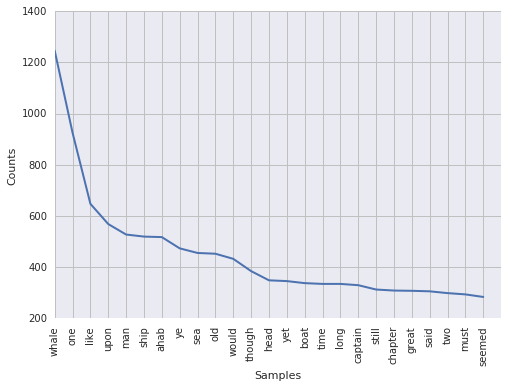

In [13]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)